In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_samples = 1000

data = {
    "FanID": range(1, num_samples + 1),
    "Age": np.random.randint(18, 60, size=num_samples),
    "Gender": np.random.choice(["Male", "Female", "Other"], size=num_samples, p=[0.45, 0.45, 0.1]),
    "Location": np.random.choice(["Urban", "Suburban", "Rural"], size=num_samples, p=[0.5, 0.3, 0.2]),
    "SocialMediaLikes": np.random.randint(0, 500, size=num_samples),
    "SocialMediaShares": np.random.randint(0, 200, size=num_samples),
    "GameAttendance": np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3]),  # 1: Attended, 0: Did not attend
    "MerchandisePurchases": np.random.randint(0, 20, size=num_samples),
    "AverageTicketPrice": np.random.uniform(30, 150, size=num_samples),
    "TeamPerformanceScore": np.random.randint(50, 100, size=num_samples),
}

engagement_level = []
for i in range(num_samples):
    score = (
        data["SocialMediaLikes"][i] * 0.3 +
        data["SocialMediaShares"][i] * 0.2 +
        data["GameAttendance"][i] * 50 +
        data["MerchandisePurchases"][i] * 5 +
        data["TeamPerformanceScore"][i] * 0.1
    )
    if score < 50:
        engagement_level.append("Low")
    elif 50 <= score < 100:
        engagement_level.append("Medium")
    else:
        engagement_level.append("High")

data["EngagementLevel"] = engagement_level

df = pd.DataFrame(data)

df.to_csv("fan_engagement_dataset.csv", index=False)

print("Synthetic dataset generated and saved as 'fan_engagement_dataset.csv'.")


Synthetic dataset generated and saved as 'fan_engagement_dataset.csv'.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("fan_engagement_dataset.csv")

print("Dataset Overview:")
print(df.head())
print(df.info())


Dataset Overview:
   FanID  Age  Gender Location  SocialMediaLikes  SocialMediaShares  \
0      1   56  Female    Rural               222                 47   
1      2   46    Male    Rural               221                193   
2      3   32  Female    Urban                 2                135   
3      4   25    Male    Urban               477                 21   
4      5   38  Female    Rural                 5                  5   

   GameAttendance  MerchandisePurchases  AverageTicketPrice  \
0               0                    13           52.010837   
1               0                     3           30.820890   
2               0                    15           86.042144   
3               0                     0          112.278210   
4               1                    16           57.153280   

   TeamPerformanceScore EngagementLevel  
0                    59            High  
1                    50            High  
2                    91            High  
3       

In [5]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  
df["Location"] = label_encoder.fit_transform(df["Location"])  
df["EngagementLevel"] = label_encoder.fit_transform(df["EngagementLevel"])  


X = df.drop(columns=["FanID", "EngagementLevel"]) 
y = df["EngagementLevel"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))


Classification Report:
              precision    recall  f1-score   support

         Low       0.97      0.99      0.98       180
      Medium       1.00      1.00      1.00         2
        High       0.92      0.67      0.77        18

    accuracy                           0.96       200
   macro avg       0.96      0.89      0.92       200
weighted avg       0.96      0.96      0.96       200



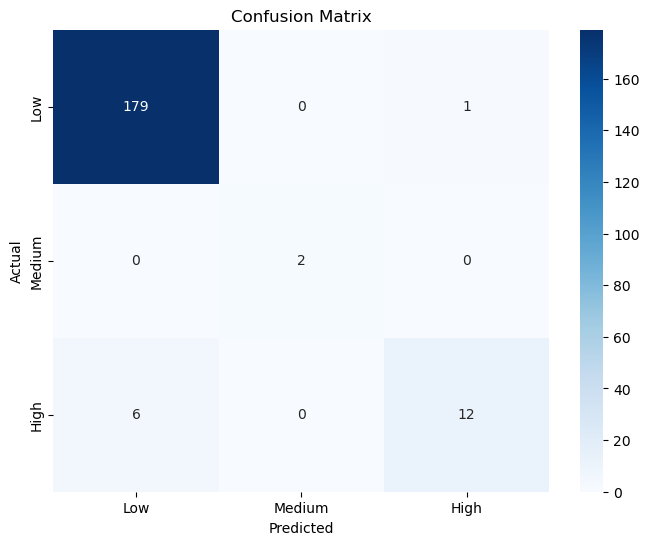

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


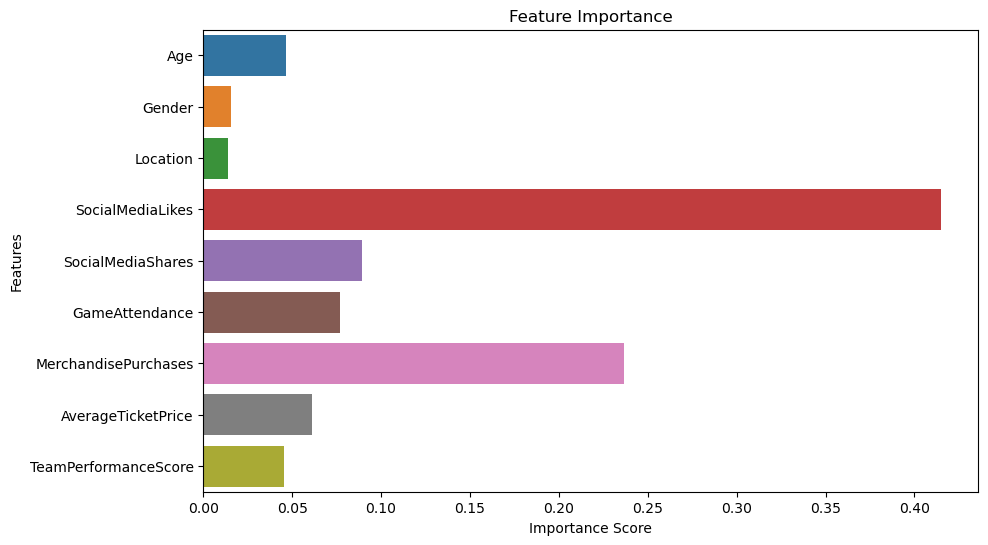

In [8]:
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()